## Model Training:

Predicting Math score on basis of other features.

---
### Importing Dataset and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


---

### Preparing X and y Variables and Encoding:

In [3]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [4]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [7]:
# Data Encoding:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_encoder,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
# train test split:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape 

((800, 19), (200, 19))

---

### Model Training

In [11]:
# Creating Evaluation Function for the model:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r_square = r2_score(true,predicted)
    
    return mae,rmse,r_square

In [13]:
models = {
    "Linear Regressor": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #Training the model
    model.fit(X_train,y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("- Root Mean Squared error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("-"*50)

    print("Model Performance for Test Set")
    print("- Root Mean Squared error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*50)
    print("\n")

Linear Regressor
Model Performance for Training Set
- Root Mean Squared error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Ridge
Model Performance for Training Set
- Root Mean Squared error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model Performance for Training Set
- Root Mean Squared error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Decision Tree Regressor
Model Performance for Training Set
- Root Mean Squared error: 0.2795
- Mean Absolute Error: 

---
### Results

In [14]:
results = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

In [15]:
results

,Model Name,R2_Score
1,Ridge,0.880593
0,Linear Regressor,0.880345
9,CatBoost Regressor,0.851632
7,AdaBoost Regressor,0.850769
5,Random Forest Regressor,0.850168
8,XGBoost Regressor,0.827797
2,Lasso,0.825320
4,K Neighbors Regressor,0.783813
3,Decision Tree Regressor,0.738245
6,Support Vector Regressor,0.728600


### Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


### Plot y_pred and y_test

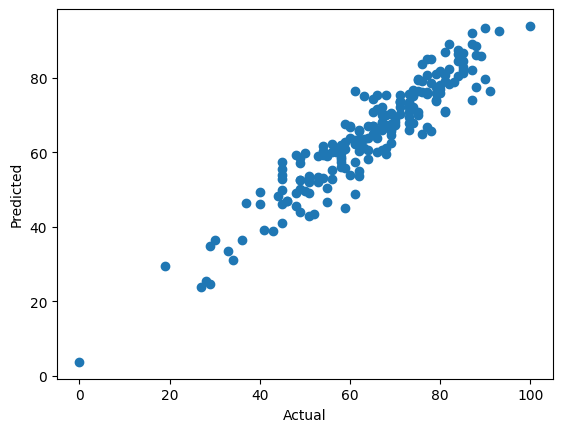

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

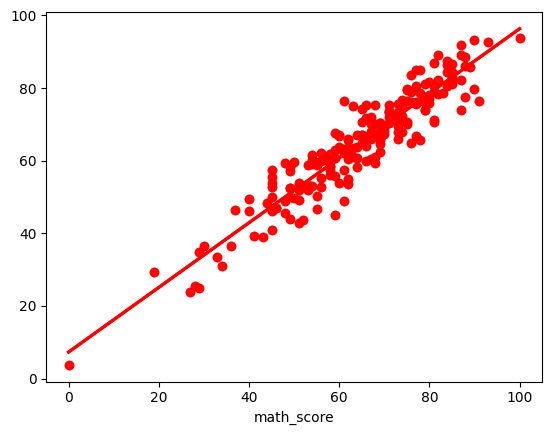

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()

### Difference Between Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
